In [1]:
import warnings; warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  


file = "./Desktop/boston.csv"
df = pd.read_csv(file)
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# Get the general information of the features
df.info()
print("\nColumn names in the data: ")
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB

Column names in the data: 
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [4]:
# Count NA values in each column
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
# Drop the NA values
df.dropna(inplace=True)

In [8]:
# Get how many values can the features take
df.nunique() 

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

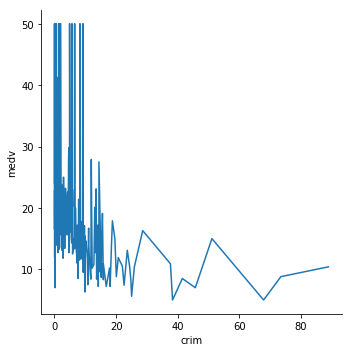

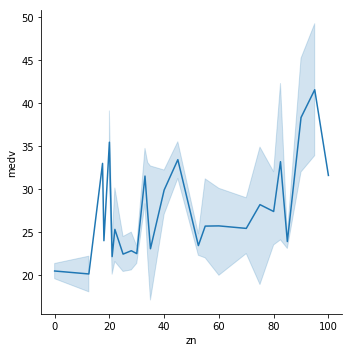

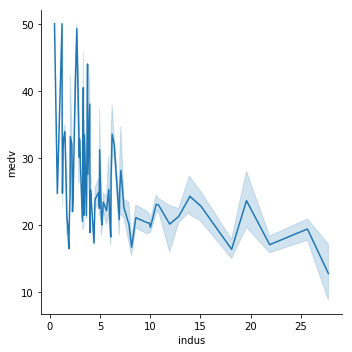

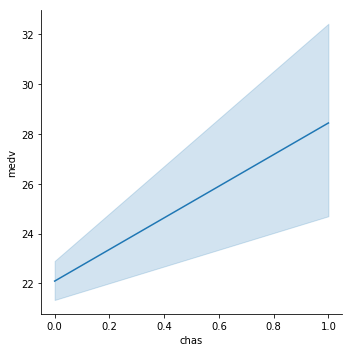

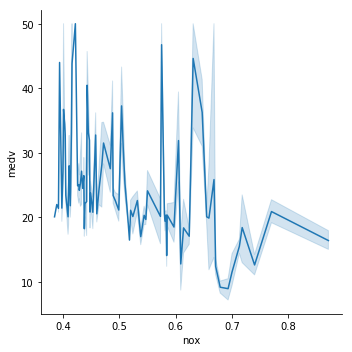

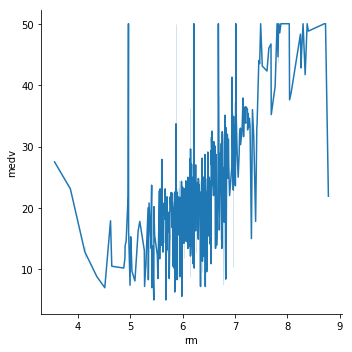

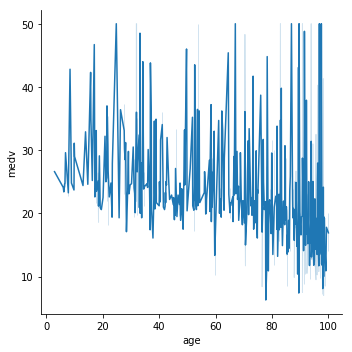

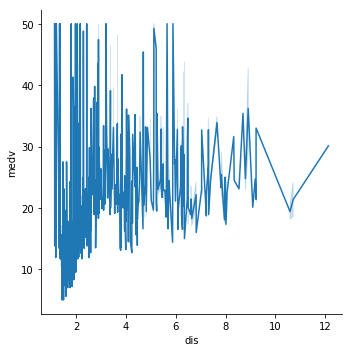

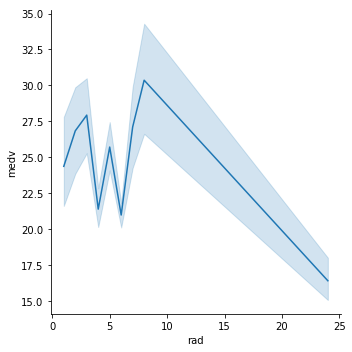

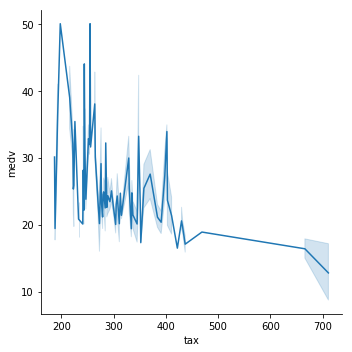

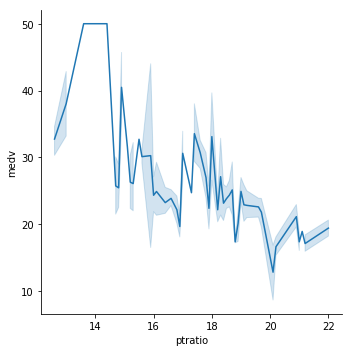

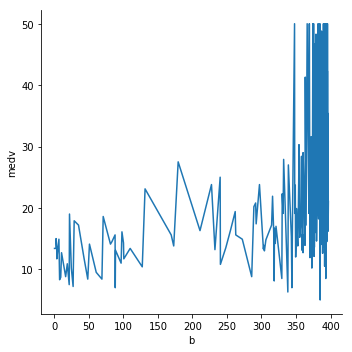

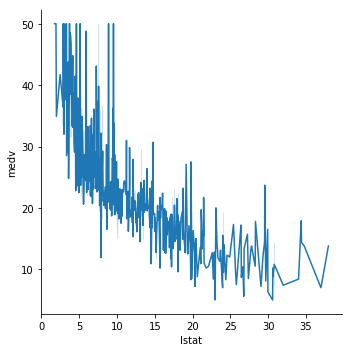

In [9]:
for i in ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']:
    sns.relplot(x=i,y="medv", kind="line" ,data=df)

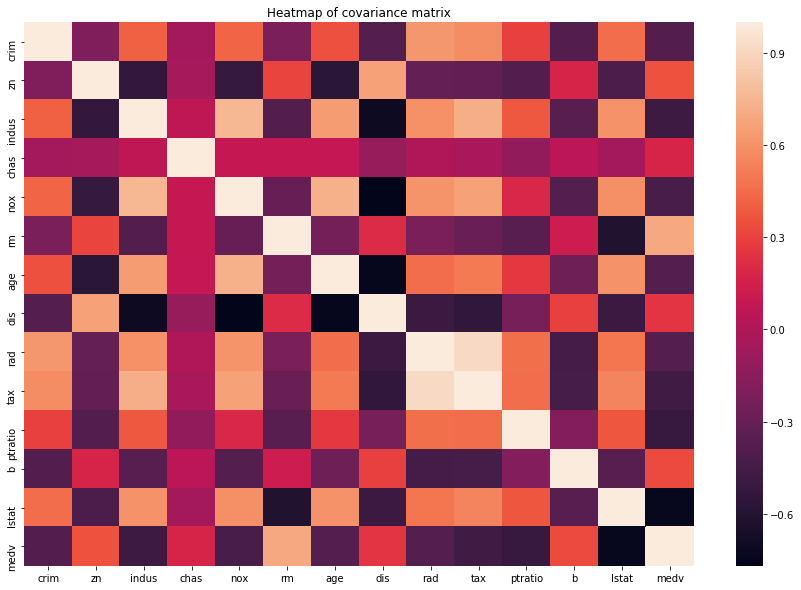

In [10]:
# Plotting the covariance matrix

fig=plt.figure(figsize=(15,10))
sns.heatmap(df.corr())
plt.title("Heatmap of covariance matrix")
plt.show()

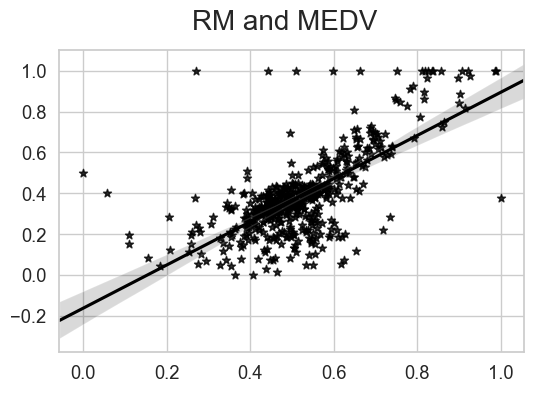

In [18]:
# choose "rm" and "lstat"
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = df.copy()
df1 = df1.drop(['crim', 'zn', 'indus', 'chas', 'nox', 'age','dis', 'rad', 'tax', 'ptratio', 'b'], axis=1)

scaler = MinMaxScaler()
df2 = scaler.fit_transform(df1)

x1 = df2[:,0]
m = df2[:,1]
y1= df2[:,2]


fig = plt.figure(dpi=100)
fig.suptitle('RM and MEDV', fontsize=20)
sns.set(style="whitegrid",font_scale=1.2)
g=sns.regplot(x=x1, y=y1, data=df2,
             color='#000000',
             marker='*',
             ci=95,             # 95% confidence interval
             )


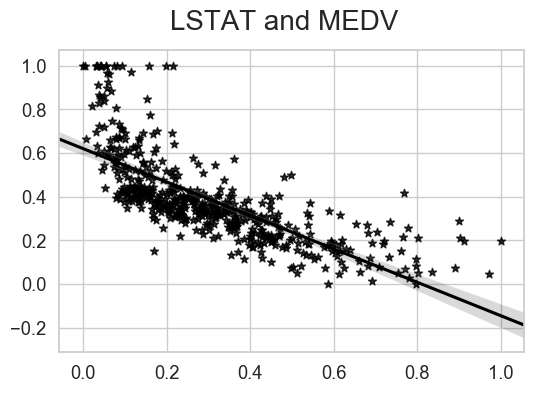

In [26]:
fig = plt.figure(dpi=100)
fig.suptitle('LSTAT and MEDV', fontsize=20)
sns.set(style="whitegrid",font_scale=1.2)
g=sns.regplot(x=m, y=y1, data=df2,
             color='#000000',
             marker='*',
             ci=95,            # 95% confidence interval
             )

In [28]:
import warnings; warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import math
%matplotlib inline  


file = "./Desktop/boston.csv"
df = pd.read_csv(file)

# choose "lstat" and "rm"
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = df.copy()
df1 = df1.drop(['crim', 'zn', 'indus', 'chas', 'nox', 'age','dis', 'rad', 'tax', 'ptratio', 'b'], axis=1)

scaler = MinMaxScaler()
df2 = scaler.fit_transform(df1)

rmdata = df2[:,0]
disdata = df2[:,1]
y0= df2[:,2]


rmdata1=rmdata.reshape(-1,1)
disdata1=disdata.reshape(-1,1)
y_n = y0.reshape(-1,1)
X_n = np.hstack([rmdata1,disdata1])

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X_n,y_n,test_size=0.2,random_state=666)

In [30]:
# 初始化一系列参数
# 截距
theta0 = 0
# 系数
theta1 = 0
theta2 = 0

# 学习率 
learning_rate = 0.01
# 初始化迭代次数
n_iterables = 1000


# 定义代价函数（loss function）#Using RMSE
def compute_mse(theta0, theta1, theta2, x_data, y_data):
    total_error = 0
    for i in range(len(x_data)):
        # 计算损失 真实值:y_data  预测值h(x)=theta0 + theta1*x1 + theta2*x2
        total_error += (y_data[i] - (theta0 + theta1 * x_data[i, 0] + theta2 * x_data[i, 1])) ** 2

    mse_ = total_error / len(x_data)
    rmse_ = math.sqrt(mse_)                                          # compute RMSE
    return rmse_

Beginning：Intercept theta0=0,theta1 on RM =0,theta2 on LSTAT=0,MSER =0.4430248091728033
Start to iterate


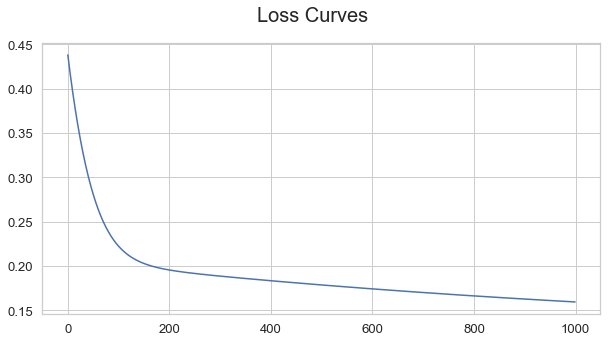

After1000iterations：Intercept theta0=[0.28419806],theta1 on RM =[0.29932883],theta2 on LSTAT=[-0.16044718],MSER =0.15953505378787014


In [31]:
def gradient_descent(x_data, y_data, theta0, theta1, theta2, learning_rate, n_iterables):
    m = len(x_data)
    losses = []
    
   
    # 循环 --> 迭代次数
    for i in range(n_iterables):
        # 初始化 theta0 theta1 theta2 的偏导值
        theta0_grad = 0
        theta1_grad = 0
        theta2_grad = 0

        # 计算偏导的总和再平均
        # 遍历m次
        for j in range(m):
            theta0_grad += (1 / m) * ((theta1 * x_data[j, 0] + theta2 * x_data[j, 1] + theta0) - y_data[j])
            theta1_grad += (1 / m) * ((theta1 * x_data[j, 0] + theta2 * x_data[j, 1] + theta0) - y_data[j]) * x_data[
                j, 0]
            theta2_grad += (1 / m) * ((theta1 * x_data[j, 0] + theta2 * x_data[j, 1] + theta0) - y_data[j]) * x_data[
                j, 1]

        # updata theta
        theta0 = theta0 - (learning_rate * theta0_grad)
        theta1 = theta1 - (learning_rate * theta1_grad)
        theta2 = theta2 - (learning_rate * theta2_grad)
    
    
        
        loss = compute_mse(theta0, theta1, theta2, x_data, y_data)
        losses.append(loss)
    
    
    fig=plt.figure(figsize=(10,5))
    fig.suptitle('Loss Curves', fontsize=20)
    plot_x = np.arange(n_iterables)
    plot_y = np.array(losses)
    plt.plot(plot_x, plot_y)
    plt.show()
    
    
    return theta0, theta1, theta2


print(f"Beginning：Intercept theta0={theta0},theta1 on RM ={theta1},theta2 on LSTAT={theta2},MSER ={compute_mse(theta0,theta1,theta2,X_train,y_train)}")
print("Start to iterate")
theta0,theta1,theta2 = gradient_descent(X_train,y_train,theta0,theta1,theta2,learning_rate,n_iterables)
print(f"After{n_iterables}iterations：Intercept theta0={theta0},theta1 on RM ={theta1},theta2 on LSTAT={theta2},MSER ={compute_mse(theta0,theta1,theta2,X_train,y_train)}")


In [33]:
thetahat = np.array([theta1, theta2])
y_predict = X_test.dot(thetahat)
from sklearn.metrics import mean_squared_error
 
RMSE = mean_squared_error(y_test,y_predict)
print("error in terms of RMSE：",RMSE)

error in terms of RMSE： 0.09735388278759177


0th iteration
Beginning：Intercept theta0=0,theta1 on RM=0,theta2 on LSTAT=0,MSER =0.4430248091728033
Start to iterate
After1000iterations：Intercept theta0=[0.28419806],theta1 on RM=[0.29932883],theta2 on LSTAT=[-0.16044718],MSER=0.15953505378787014
--------------------------------------------------------------------------------
1th iteration
Beginning：Intercept theta0=0,theta1 on RM=0,theta2 on LSTAT=0,MSER =0.4430248091728033
Start to iterate
After1100iterations：Intercept theta0=[0.28393564],theta1 on RM=[0.31073154],theta2 on LSTAT=[-0.17915756],MSER=0.15649645086287184
--------------------------------------------------------------------------------
2th iteration
Beginning：Intercept theta0=0,theta1 on RM=0,theta2 on LSTAT=0,MSER =0.4430248091728033
Start to iterate
After1200iterations：Intercept theta0=[0.28366627],theta1 on RM=[0.32161853],theta2 on LSTAT=[-0.19696099],MSER=0.1536881785535778
--------------------------------------------------------------------------------
3th iterati

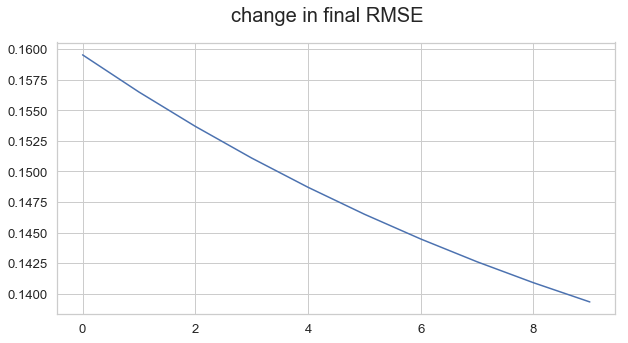

In [34]:
#numbers of iteration
rmselist = []
for i in range(10):
    X_train,X_test,y_train,y_test = train_test_split(X_n,y_n,test_size=0.2,random_state=666)
    theta0 = 0
    theta1 = 0
    theta2 = 0
    learning_rate = 0.01

    # change in the numbers of iteration
    
    n_iterables = 1000 + 100*i
    def gradient_descent1(x_data, y_data, theta0, theta1, theta2, learning_rate, n_iterables):
        m = len(x_data)
        for i in range(n_iterables):
            theta0_grad = 0
            theta1_grad = 0
            theta2_grad = 0
            
            for j in range(m):
                theta0_grad += (1 / m) * ((theta1 * x_data[j, 0] + theta2 * x_data[j, 1] + theta0) - y_data[j])
                theta1_grad += (1 / m) * ((theta1 * x_data[j, 0] + theta2 * x_data[j, 1] + theta0) - y_data[j]) * x_data[
                    j, 0]
                theta2_grad += (1 / m) * ((theta1 * x_data[j, 0] + theta2 * x_data[j, 1] + theta0) - y_data[j]) * x_data[
                    j, 1]
            
            
            theta0 = theta0 - (learning_rate * theta0_grad)
            theta1 = theta1 - (learning_rate * theta1_grad)
            theta2 = theta2 - (learning_rate * theta2_grad)
        
        return theta0, theta1, theta2
    print(f"{i}th iteration")
    print(f"Beginning：Intercept theta0={theta0},theta1 on RM={theta1},theta2 on LSTAT={theta2},MSER ={compute_mse(theta0,theta1,theta2,X_train,y_train)}")
    print("Start to iterate")
    theta0,theta1,theta2 = gradient_descent1(X_train,y_train,theta0,theta1,theta2,learning_rate,n_iterables)
    rmsei = compute_mse(theta0,theta1,theta2,X_train,y_train)
    print(f"After{n_iterables}iterations：Intercept theta0={theta0},theta1 on RM={theta1},theta2 on LSTAT={theta2},MSER={rmsei}")
    rmselist.append(rmsei)
    print('--------------------------------------------------------------------------------')
    
    
fig=plt.figure(figsize=(10,5))
fig.suptitle('change in final RMSE', fontsize=20)
plot_x = np.arange(10)
plot_y = np.array(rmselist)
plt.plot(plot_x, plot_y)
plt.show()

0.01*0+0.01 stepsize
Beginning：Intercept theta0=0,theta1 on RM=0,theta2 on LSTAT=0,MSER =0.4430248091728033
Start to iterate
After1000iterations：Intercept theta0=[0.28419806],theta1 on RM=[0.29932883],theta2 on LSTAT=[-0.16044718],MSER=0.15953505378787014
--------------------------------------------------------------------------------
0.01*1+0.01 stepsize
Beginning：Intercept theta0=0,theta1 on RM=0,theta2 on LSTAT=0,MSER =0.4430248091728033
Start to iterate
After1000iterations：Intercept theta0=[0.28131713],theta1 on RM=[0.39287995],theta2 on LSTAT=[-0.31158457],MSER=0.13787938649512846
--------------------------------------------------------------------------------
0.01*2+0.01 stepsize
Beginning：Intercept theta0=0,theta1 on RM=0,theta2 on LSTAT=0,MSER =0.4430248091728033
Start to iterate
After1000iterations：Intercept theta0=[0.27808214],theta1 on RM=[0.45240663],theta2 on LSTAT=[-0.40318128],MSER=0.12875486580103368
----------------------------------------------------------------------

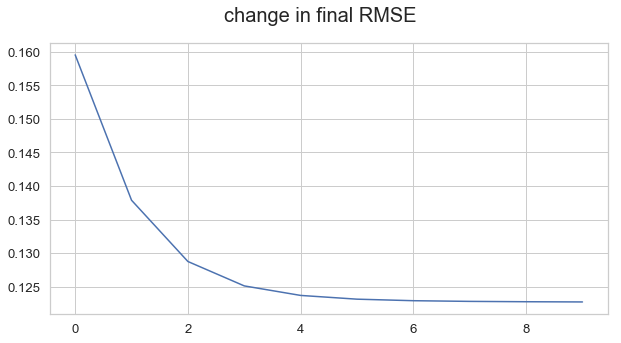

In [37]:
#stepsize
rmselist1 = []
for i in range(10):
    X_train,X_test,y_train,y_test = train_test_split(X_n,y_n,test_size=0.2,random_state=666)
    theta0 = 0
    theta1 = 0
    theta2 = 0
    learning_rate = 0.01+0.01*i

    # change in the stepsize
    
    n_iterables = 1000
    def gradient_descent1(x_data, y_data, theta0, theta1, theta2, learning_rate, n_iterables):
        m = len(x_data)
        for i in range(n_iterables):
            theta0_grad = 0
            theta1_grad = 0
            theta2_grad = 0
            
            for j in range(m):
                theta0_grad += (1 / m) * ((theta1 * x_data[j, 0] + theta2 * x_data[j, 1] + theta0) - y_data[j])
                theta1_grad += (1 / m) * ((theta1 * x_data[j, 0] + theta2 * x_data[j, 1] + theta0) - y_data[j]) * x_data[
                    j, 0]
                theta2_grad += (1 / m) * ((theta1 * x_data[j, 0] + theta2 * x_data[j, 1] + theta0) - y_data[j]) * x_data[
                    j, 1]
            
            
            theta0 = theta0 - (learning_rate * theta0_grad)
            theta1 = theta1 - (learning_rate * theta1_grad)
            theta2 = theta2 - (learning_rate * theta2_grad)
        
        return theta0, theta1, theta2
    print(f"0.01*{i}+0.01 stepsize")
    print(f"Beginning：Intercept theta0={theta0},theta1 on RM={theta1},theta2 on LSTAT={theta2},MSER ={compute_mse(theta0,theta1,theta2,X_train,y_train)}")
    print("Start to iterate")
    theta0,theta1,theta2 = gradient_descent1(X_train,y_train,theta0,theta1,theta2,learning_rate,n_iterables)
    rmsei = compute_mse(theta0,theta1,theta2,X_train,y_train)
    print(f"After{n_iterables}iterations：Intercept theta0={theta0},theta1 on RM={theta1},theta2 on LSTAT={theta2},MSER={rmsei}")
    rmselist1.append(rmsei)
    print('--------------------------------------------------------------------------------')
    
    
fig=plt.figure(figsize=(10,5))
fig.suptitle('change in final RMSE', fontsize=20)
plot_x = np.arange(10)
plot_y = np.array(rmselist1)
plt.plot(plot_x, plot_y)
plt.show()